In [20]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import numpy as np
import os

In [21]:
# Directory where the TensorBoard logs are stored
log_dir = os.getcwd()
run_folders = [os.path.join(log_dir, run) for run in os.listdir(log_dir) if os.path.isdir(os.path.join(log_dir, run))]

## 3. Policy Gradients

### CartPole
Plot Evaluation Average Return against number of environment steps

In [26]:
cartpole_small = [f for f in run_folders if ('pg_cartpole' in f) and ('LongBatch' not in f)]
cartpole_large = [f for f in run_folders if ('pg_cartpole' in f) and ('LongBatch' in f)]

- small batch (1000)

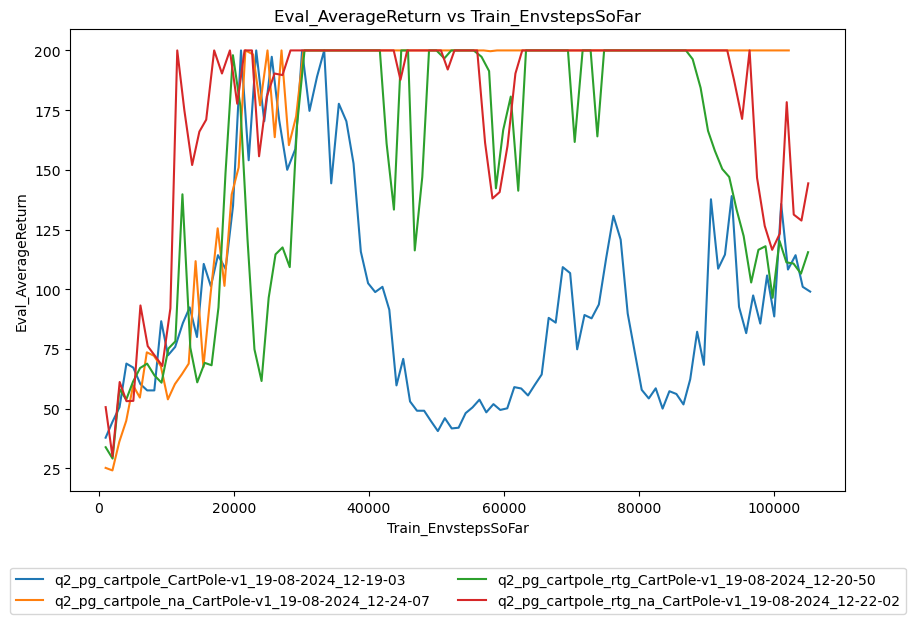

In [28]:
plt.figure(figsize=(10, 6))

# Loop through small_batch run folder to extract and plot the data
for run_folder in cartpole_small:
    event_acc = EventAccumulator(run_folder)
    event_acc.Reload()

    # Extracting values to plot
    try:
        steps = np.array([int(s.value) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
        values = np.array([s.value for s in event_acc.Scalars('Eval_AverageReturn')])

        # Plotting
        plt.plot(steps, values, label=os.path.basename(run_folder))  # using run folder name as label
    except Exception as e:
        print(f"Could not retrieve data for {run_folder}: {e}")

# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('Train_EnvstepsSoFar')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs Train_EnvstepsSoFar')

# Show plot
plt.show()

- large batch(4000)

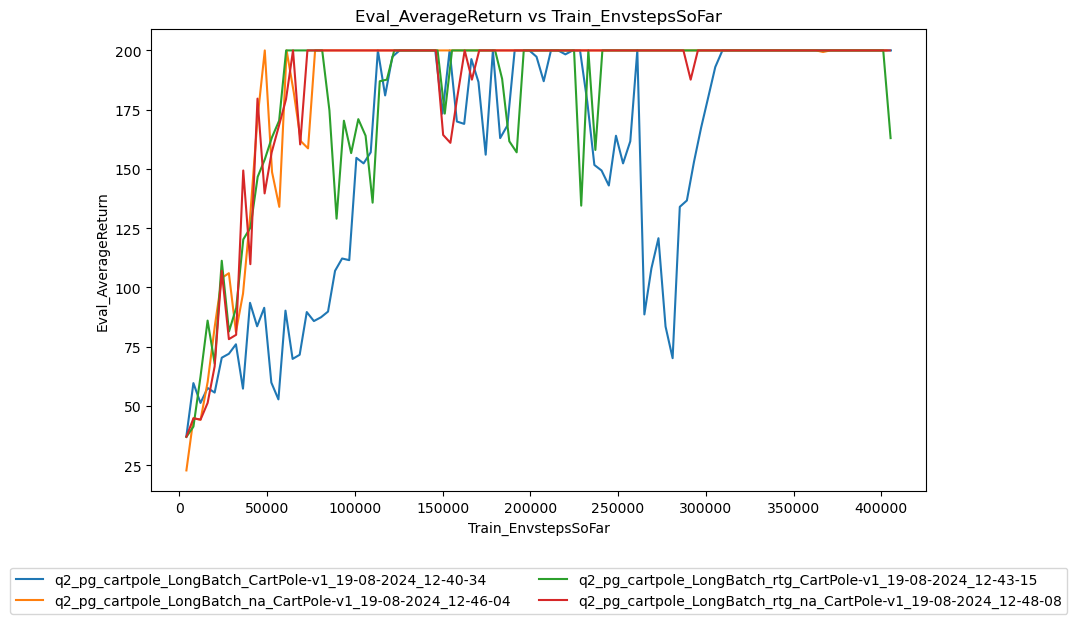

In [29]:
plt.figure(figsize=(10, 6))

# Loop through small_batch run folder to extract and plot the data
for run_folder in cartpole_large:
    event_acc = EventAccumulator(run_folder)
    event_acc.Reload()

    # Extracting values to plot
    try:
        steps = np.array([int(s.value) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
        values = np.array([s.value for s in event_acc.Scalars('Eval_AverageReturn')])

        # Plotting
        plt.plot(steps, values, label=os.path.basename(run_folder))  # using run folder name as label
    except Exception as e:
        print(f"Could not retrieve data for {run_folder}: {e}")

# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('Train_EnvstepsSoFar')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs Train_EnvstepsSoFar')

# Show plot
plt.show()

-compare the influence of batchsize

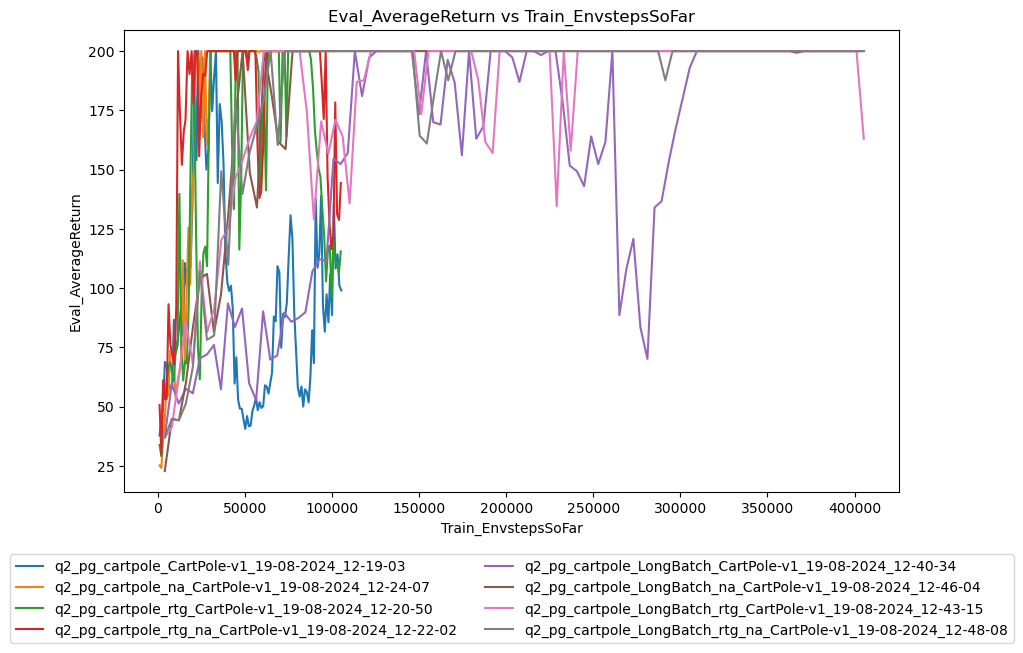

In [52]:
plt.figure(figsize=(10, 6))

# Loop through small_batch run folder to extract and plot the data
for run_folder in cartpole_small:
    event_acc = EventAccumulator(run_folder)
    event_acc.Reload()

    # Extracting values to plot
    try:
        steps = np.array([int(s.value) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
        values = np.array([s.value for s in event_acc.Scalars('Eval_AverageReturn')])

        # Plotting
        plt.plot(steps, values, label=os.path.basename(run_folder))  # using run folder name as label
    except Exception as e:
        print(f"Could not retrieve data for {run_folder}: {e}")


for run_folder in cartpole_large:
    event_acc = EventAccumulator(run_folder)
    event_acc.Reload()

    # Extracting values to plot
    try:
        steps = np.array([int(s.value) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
        values = np.array([s.value for s in event_acc.Scalars('Eval_AverageReturn')])

        # Plotting
        plt.plot(steps, values, label=os.path.basename(run_folder))  # using run folder name as label
    except Exception as e:
        print(f"Could not retrieve data for {run_folder}: {e}")

# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)
plt.xlabel('Train_EnvstepsSoFar')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs Train_EnvstepsSoFar')

# Show plot
plt.show()

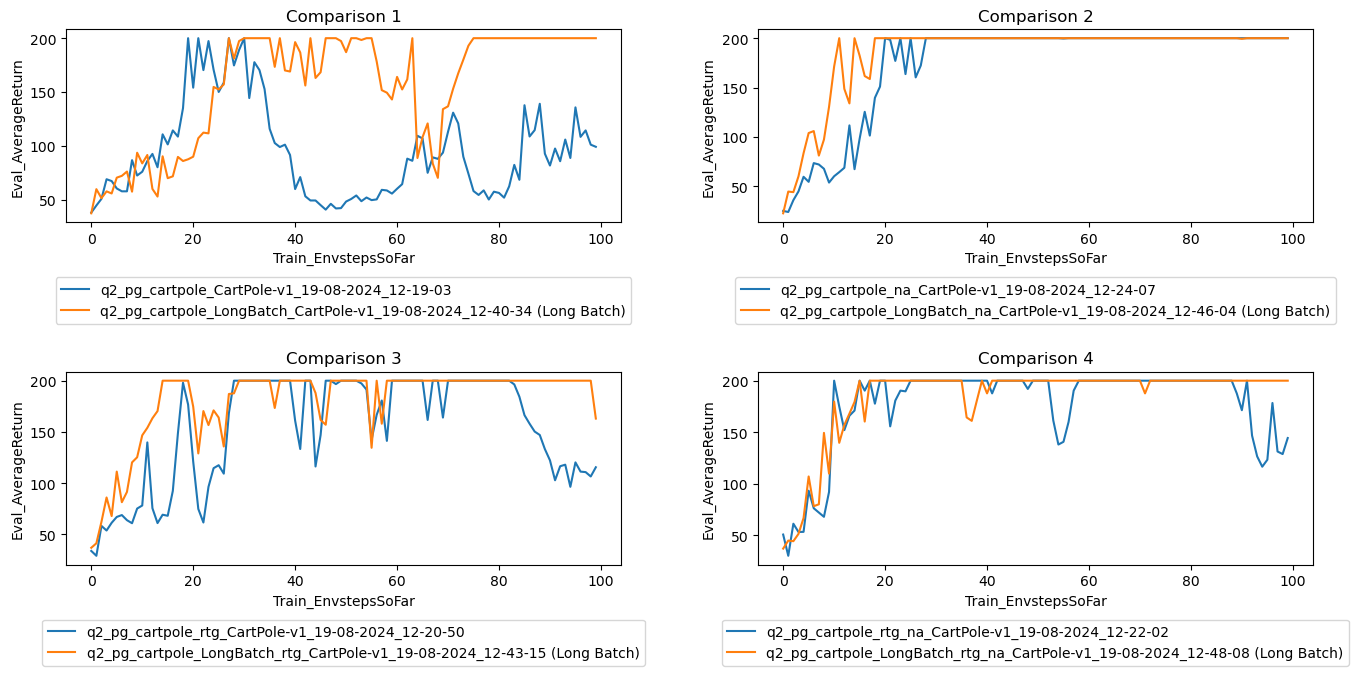

In [61]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
import os

# Assuming cartpole_small and cartpole_large each contain four directories
assert len(cartpole_small) == len(cartpole_large) == 4

# Create a figure with 4 subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(14, 7) ) # 2 rows, 2 columns

# Loop through the pairs of data from cartpole_small and cartpole_large
for i, (small_run_folder, large_run_folder) in enumerate(zip(cartpole_small, cartpole_large)):
    ax = axes[i // 2, i % 2]  # Access each subplot in the grid

    # Plotting cartpole_small data
    small_event_acc = EventAccumulator(small_run_folder)
    small_event_acc.Reload()
    try:
        small_steps = np.array([int(s.step) for s in small_event_acc.Scalars('Train_EnvstepsSoFar')])
        small_values = np.array([s.value for s in small_event_acc.Scalars('Eval_AverageReturn')])
        ax.plot(small_steps, small_values, label=f'{os.path.basename(small_run_folder)}')
    except Exception as e:
        print(f"Could not retrieve data for {small_run_folder}: {e}")

    # Plotting cartpole_large data
    large_event_acc = EventAccumulator(large_run_folder)
    large_event_acc.Reload()
    try:
        large_steps = np.array([int(s.step) for s in large_event_acc.Scalars('Train_EnvstepsSoFar')])
        large_values = np.array([s.value for s in large_event_acc.Scalars('Eval_AverageReturn')])
        ax.plot(large_steps, large_values, label=f'{os.path.basename(large_run_folder)} (Long Batch)')
    except Exception as e:
        print(f"Could not retrieve data for {large_run_folder}: {e}")

    # Setting labels, title, and legend for each subplot
    ax.set_xlabel('Train_EnvstepsSoFar')
    ax.set_ylabel('Eval_AverageReturn')
    ax.set_title(f'Comparison {i+1}')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()
